### 12-05-2020


In [1]:
from sklearn.datasets import make_classification,make_blobs,make_biclusters

In [2]:
X,y = make_blobs(n_features=2,n_samples=100,centers=2)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline


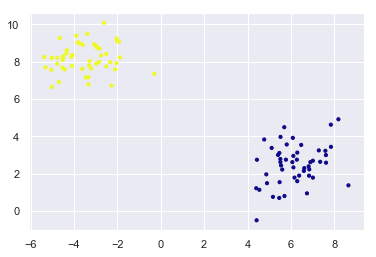

In [4]:
plt.scatter(X[:,0],X[:,1],c=y,s=10,cmap= 'plasma')

### Agenda 
* Understanding Linear MOdels for classification 
* maths behind it
* Examples

### understand Linear model for classification
* _It's Linear model - trying to predict line or place
* _in these case,its trying to predict a line which best separates the two clases


__y = w0*x1+w1__

_out__class = logit(y)_

<img src ="https://camo.githubusercontent.com/fb762503584c2d86ad0b6c1513ad2d39495035c2/68747470733a2f2f7265732e636c6f7564696e6172792e636f6d2f6479643931316b6d682f696d6167652f75706c6f61642f665f6175746f2c715f6175746f3a626573742f76313533343238313838302f696d616765345f6777356d6d762e706e67">

In [5]:
import numpy as np 

__No matter what is X,it brings the number into the scale of 0,1__

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-1))

In [7]:
sigmoid(-10)

0.7310585786300049

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
lr = LogisticRegression()

In [10]:
y

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [11]:
lr.fit(X,y)

C:\Users\saket\Anaconda333\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Importent notes
* https://www.holehouse.org/mlclass/06_Logistic_Regression.html
* __Linear models just predicts line similar to linear regression__
* __output of the linear models is continues in nature we need ro convert it to descrete in nature__
* __For this Logistic Regression applies sigmoid on the continues data thus converting in range of 0 & 1__
<hr>
* __For Biclass 0 to 0.5 is 0 and 0.5 to 1 is class 1__
* __Loss function of _logistic Regression_ = sigma(w1*x1+w0)__
* __Gradiant Descent works on this__ _loss_ 

In [12]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [13]:
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])

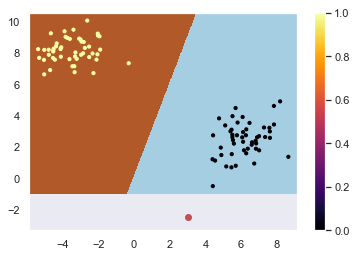

In [16]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10,cmap = 'inferno')
plt.colorbar()
plt.scatter(x=[3],y=[-2.5],c='r')

###    Predicting Employee Exit

In [45]:
import pandas as pd
hr_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt')

In [46]:
hr_data.rename(columns={'sales':'dept'}, inplace=True)

In [47]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [48]:
target = hr_data.dept

In [49]:
hr_data = hr_data.drop(columns = 'left')

__Identify the Cat columns__

In [50]:
hr_data.select_dtypes(include=object).head()

,dept,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


In [51]:
# identify the nume columns
hr_data.select_dtypes(exclude=object).head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0


In [52]:
hr_data.select_dtypes(exclude=object).columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years'],
      dtype='object')

In [53]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler

In [54]:
oe = OrdinalEncoder()

In [55]:
en_hr_data = oe.fit_transform(hr_data.select_dtypes(include=object).head())

In [56]:
ss = StandardScaler()

In [57]:
ss_hr_data = ss.fit_transform(hr_data.select_dtypes(exclude=['object']))

C:\Users\saket\Anaconda333\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\saket\Anaconda333\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
